In [3]:
# Define task

from _collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np

import sys
import os

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)

from scipy.ndimage import gaussian_filter
from sklearn.preprocessing import normalize
import seaborn as sns
import warnings
from datasets import sf_inputs_discrete

In [338]:
num_states = 20*20
num_steps=6500
sparsity_p = 0.1 #0.022
spatial_sigma = 1.
feature_maker_kwargs = {
    'feature_dim': num_states,
    'feature_type': 'correlated_distributed',
    'feature_vals_p': [1-sparsity_p, sparsity_p],
    'spatial_sigma': spatial_sigma,
    'gaussian_truncate': 1.
    }
dataset_config = {
    'num_steps': num_steps,
    'feature_maker_kwargs': feature_maker_kwargs,
    'num_states': num_states
}
dataset = sf_inputs_discrete.Sim2DWalk
dset = dataset(**dataset_config)

# Get final sparsity

In [339]:
features = dset.feature_maker.feature_map

np.sum(features > 0.2)/(features.size)

0.40369375

In [340]:
np.sum(features.flatten())/features.size

0.18477309115126175

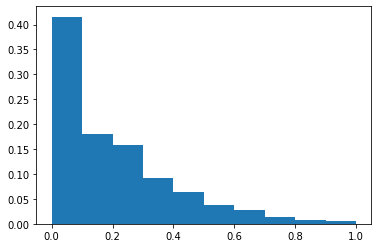

In [341]:
plt.figure()
plt.hist(features.flatten(),
    weights=[1/features.size]*features.size)
plt.show()

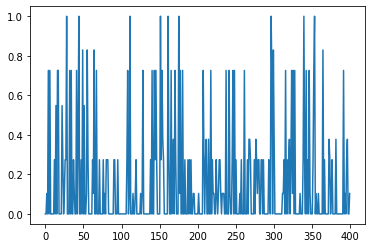

In [342]:
plt.figure()
plt.plot(features[:,0])
plt.show()

# Plot correlation

In [343]:
corr = np.zeros((20, 20))
ref_i = 10; ref_j = 10
ref_idx = ref_i*20 + ref_j

for i in range(20):
    for j in range(20):
        idx = i*20 + j
        c = np.dot(features[:,idx], features[:,ref_idx])
        corr[i,j] = c

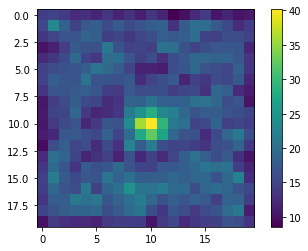

In [344]:
plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.show()